✅ All dependencies loaded.
Loading data...
Removing outliers...
Removed 10 outliers by IQR method
Data shape after cleaning: (350, 5)
Feature engineering...
Starting 5-fold GroupKFold cross-validation...

Fold 1
Fitting Linear Regression (Baseline)...
LR Regression R²: 0.6485
Fitting Stacking Regressor...
Stacking Regression R²: 0.6663
Evaluating individual baselines...
RF Regression R²: 0.6546
LGBM Regression R²: 0.6029
XGB Regression R²: 0.5106
CatBoost Regression R²: 0.6415
Fitting Classification Pipeline...
Classification accuracy (calibrated): 0.6761
              precision    recall  f1-score   support

         Low       0.64      0.67      0.65        21
      Medium       0.63      0.68      0.66        28
        High       0.79      0.68      0.73        22

    accuracy                           0.68        71
   macro avg       0.69      0.68      0.68        71
weighted avg       0.68      0.68      0.68        71



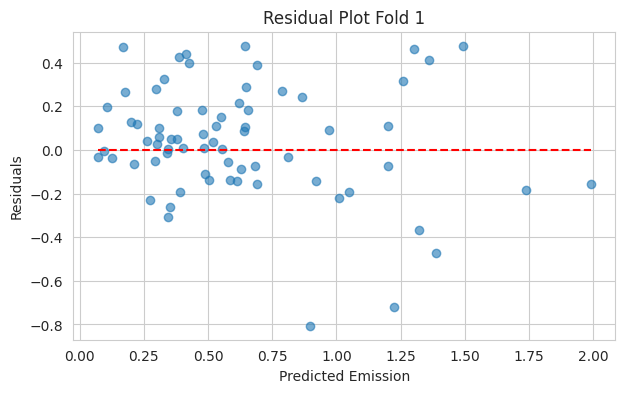

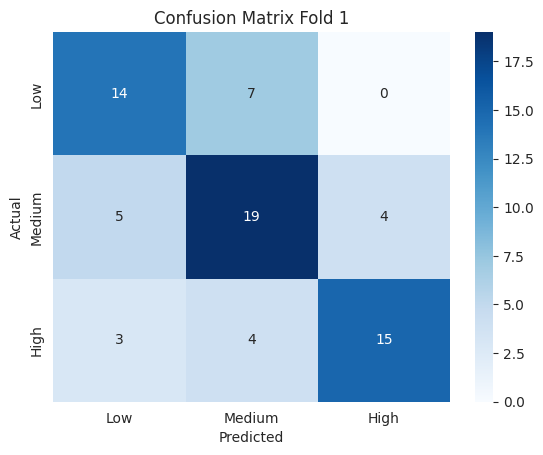

Calculating SHAP for XGBoost regressor (fold 1)
Summarizing background data using shap.kmeans...
Using shap.KernelExplainer... (this may take a moment)
Calculating SHAP values...


  0%|          | 0/71 [00:00<?, ?it/s]

Generating SHAP summary plot...


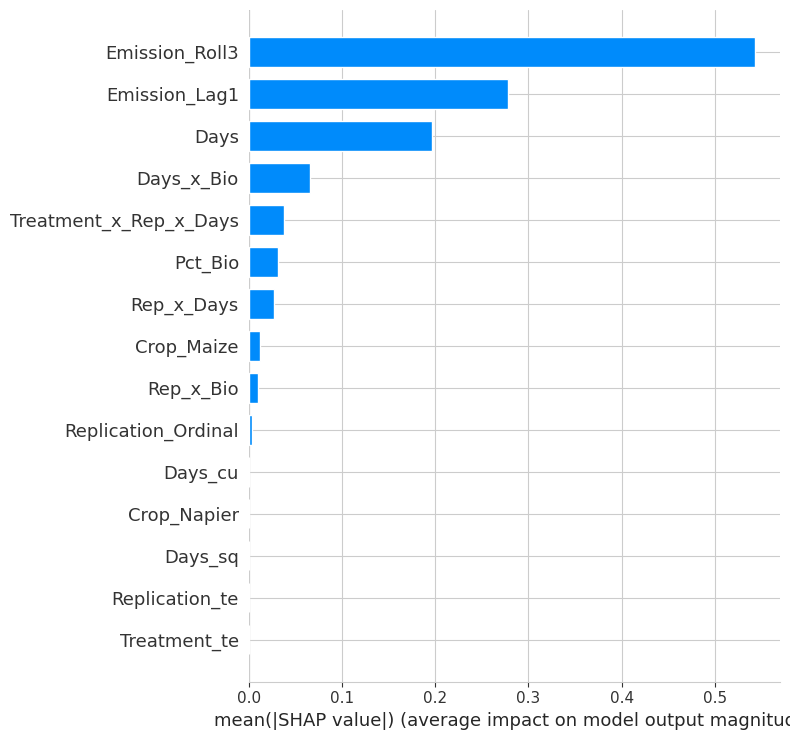

Fold 2
Fitting Linear Regression (Baseline)...
LR Regression R²: 0.5829
Fitting Stacking Regressor...
Stacking Regression R²: 0.6975
Evaluating individual baselines...
RF Regression R²: 0.7036
LGBM Regression R²: 0.4270
XGB Regression R²: 0.6510
CatBoost Regression R²: 0.6762
Fitting Classification Pipeline...
Classification accuracy (calibrated): 0.7286
              precision    recall  f1-score   support

         Low       0.69      0.89      0.78        28
      Medium       1.00      0.07      0.13        14
        High       0.76      0.89      0.82        28

    accuracy                           0.73        70
   macro avg       0.82      0.62      0.58        70
weighted avg       0.78      0.73      0.67        70



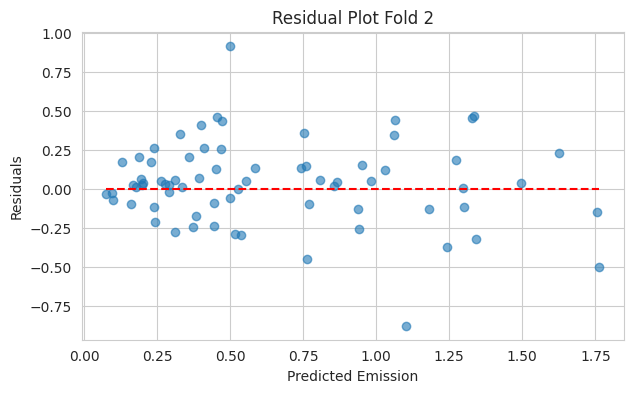

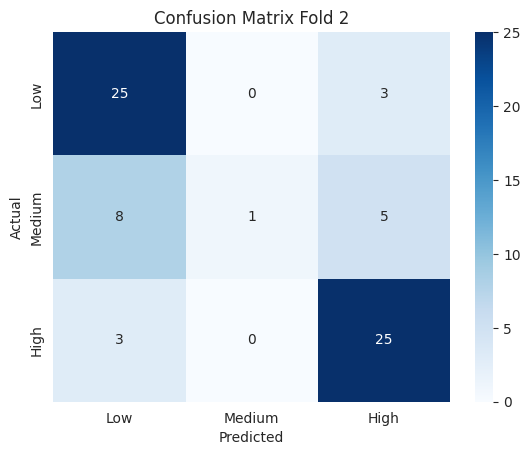

Fold 3
Fitting Linear Regression (Baseline)...
LR Regression R²: 0.4101
Fitting Stacking Regressor...
Stacking Regression R²: 0.5750
Evaluating individual baselines...
RF Regression R²: 0.5401
LGBM Regression R²: 0.6003
XGB Regression R²: 0.5588
CatBoost Regression R²: 0.5756
Fitting Classification Pipeline...
Classification accuracy (calibrated): 0.6812
              precision    recall  f1-score   support

         Low       0.76      0.66      0.70        29
      Medium       0.66      0.63      0.64        30
        High       0.60      0.90      0.72        10

    accuracy                           0.68        69
   macro avg       0.67      0.73      0.69        69
weighted avg       0.69      0.68      0.68        69



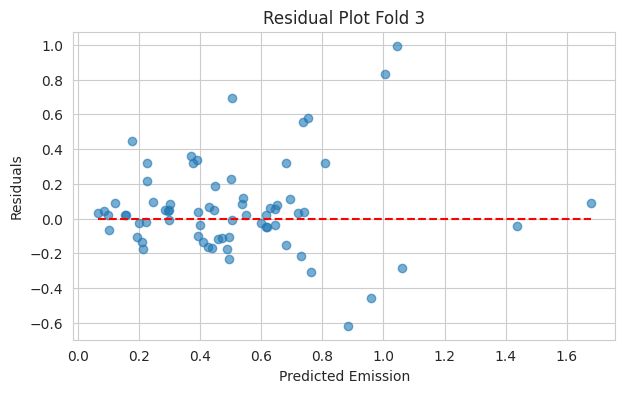

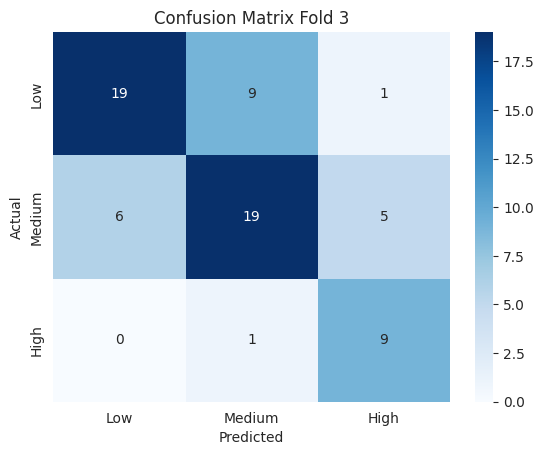

Fold 4
Fitting Linear Regression (Baseline)...
LR Regression R²: 0.5234
Fitting Stacking Regressor...
Stacking Regression R²: 0.6702
Evaluating individual baselines...
RF Regression R²: 0.5928
LGBM Regression R²: 0.6915
XGB Regression R²: 0.6276
CatBoost Regression R²: 0.6673
Fitting Classification Pipeline...
Classification accuracy (calibrated): 0.6571
              precision    recall  f1-score   support

         Low       0.71      0.63      0.67        19
      Medium       0.48      0.50      0.49        22
        High       0.77      0.79      0.78        29

    accuracy                           0.66        70
   macro avg       0.65      0.64      0.65        70
weighted avg       0.66      0.66      0.66        70



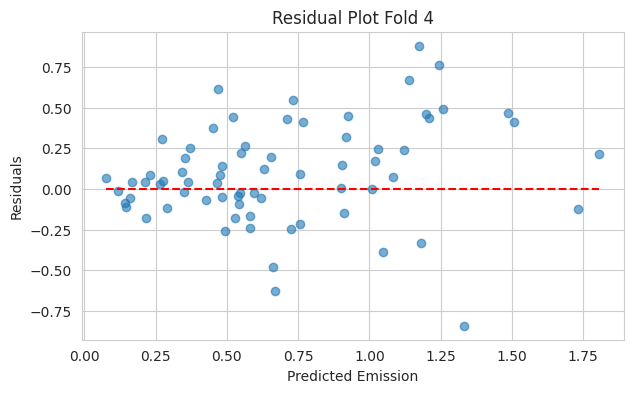

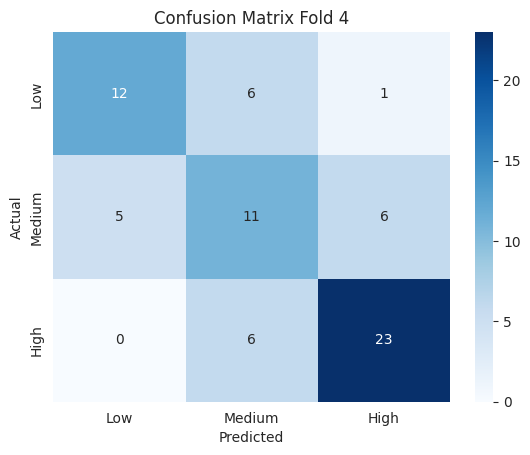

Fold 5
Fitting Linear Regression (Baseline)...
LR Regression R²: 0.3353
Fitting Stacking Regressor...
Stacking Regression R²: 0.7126
Evaluating individual baselines...
RF Regression R²: 0.6760
LGBM Regression R²: 0.7094
XGB Regression R²: 0.5998
CatBoost Regression R²: 0.7316
Fitting Classification Pipeline...
Classification accuracy (calibrated): 0.6857
              precision    recall  f1-score   support

         Low       0.67      0.70      0.68        20
      Medium       0.57      0.36      0.44        22
        High       0.74      0.93      0.83        28

    accuracy                           0.69        70
   macro avg       0.66      0.66      0.65        70
weighted avg       0.67      0.69      0.66        70



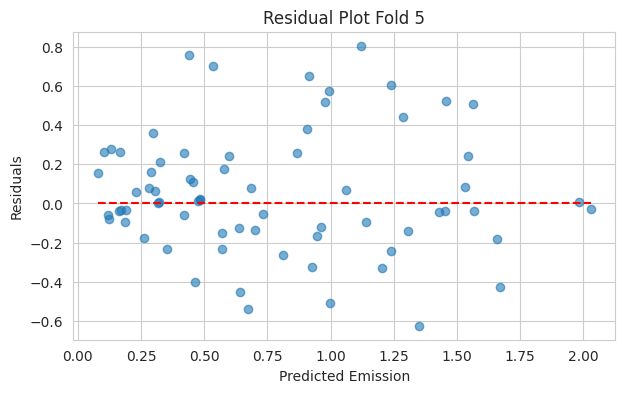

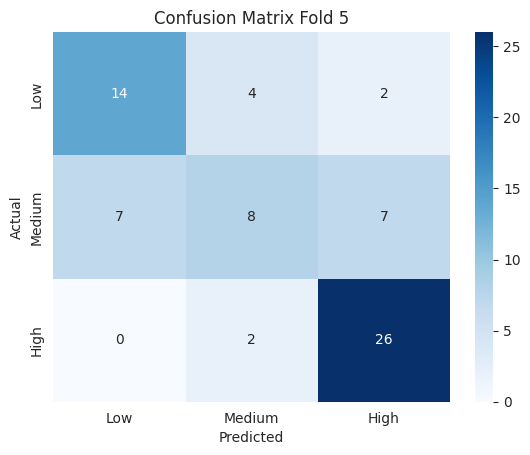


--- Cross-Validation Results ---

--- Regression R² Scores (Mean ± Std) ---
Stacking Ensemble: 0.6643 ± 0.0479
Linear Regression: 0.5000 ± 0.1137
Random Forest    : 0.6334 ± 0.0592
XGBoost          : 0.5895 ± 0.0500
LightGBM         : 0.6062 ± 0.1001
CatBoost         : 0.6584 ± 0.0508

--- Statistical Test (Stacking vs. XGBoost) ---
Paired t-test (Stacking vs. XGBoost): t-statistic = 2.9047, p-value = 0.0439
Result: The stacking model's performance gain IS statistically significant compared to XGBoost.

--- Classification Accuracy (Mean ± Std) ---
Stacking Classifier: 0.6857 ± 0.0235

--- Computational Cost (Fit Time) ---
Average Stacking Fit Time: 4.5760s
Average LR Fit Time:       0.0183s
Stacking is ~250.4x slower to fit than Linear Regression.

Training final models on full data...

Economic Cost Assessment (Maize @ Day 42) using $1.50/kg CH₄:

Treatment T1: Emission = 0.3719 mg/m²/hr, Social Emission Cost = $48.86/ha·yr
Treatment T2: Emission = 0.6704 mg/m²/hr, Social Emission Co

In [ ]:
# ===============================
# Comprehensive Methane Emissions Prediction Pipeline
# • Full dataset loading + preprocessing
# • Outlier removal
# • Extensive feature engineering (poly, interactions, lag, rolling)
# • Leakage-aware target encoding
# • Log-transform target for regression
# • Model ensembling: stacking + voting + blending (RF, LGB, XGB, CatBoost)
# • SMOTE / SVMSMOTE imbalance treatment
# • Optuna hyperparameter tuning for XGB regressors and classifiers (optional)
# • Probability calibration of classifiers
# • SHAP interpretability on best fold
# • Residuals + confusion matrix analysis
# • Economic cost-benefit predictions per treatment
# • Dependencies installed in-code (Colab/runtime ready)
# ===============================

# Install required packages (uncomment if running fresh environment)
!pip install -q xgboost lightgbm catboost shap optuna scikit-learn imbalanced-learn seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import optuna
import warnings
import time  # <-- ADDED for timing
from scipy.stats import ttest_rel  # <-- ADDED for statistical test
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import (
    RandomForestRegressor, RandomForestClassifier,
    StackingRegressor, StackingClassifier,
    VotingRegressor, VotingClassifier)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    r2_score, accuracy_score, classification_report, confusion_matrix)
from sklearn.base import TransformerMixin
from sklearn.calibration import CalibratedClassifierCV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE, SVMSMOTE

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor, CatBoostClassifier

print("✅ All dependencies loaded.")

# ----------------------------
# 1. Data Loading Functions
# ----------------------------

def load_seasonal(path, crop):
    df = pd.read_csv(path)
    if crop.lower() == "maize":
        df.rename(columns={df.columns[0]: "Treatment",
                           "R1 (kg/ha)": "R1", "R2 (kg/ha)": "R2", "R3 (kg/ha)": "R3"}, inplace=True)
    else:
        df.rename(columns={df.columns[0]: "Treatment", "R1": "R1", "R2": "R2", "R3": "R3"}, inplace=True)
        df['Treatment'] = df['Treatment'].str.split('=').str[0].str.strip()
    df_long = df.melt(
        id_vars=['Treatment'], value_vars=['R1', 'R2', 'R3'],
        var_name='Replication', value_name='Total_Emissions_kg_ha'
    )
    df_long['Crop'] = crop
    df_long['Treatment'] = df_long['Treatment'].str.extract(r'(T\d+)')
    return df_long[['Treatment', 'Crop', 'Replication', 'Total_Emissions_kg_ha']]

def load_weekly(path, crop):
    raw = pd.read_csv(path, header=[0,1])
    cols_flat = []
    for c0, c1 in raw.columns:
        if "Unnamed" in c0:
            cols_flat.append("Days")
        else:
            cols_flat.append(f"{c0.strip()}_{c1.strip()}")
    raw.columns = cols_flat
    df_long = raw.melt(id_vars=["Days"], var_name="Source", value_name="Emission_Rate")
    df_long = df_long[~df_long['Source'].str.contains("Mean|Std")]
    df_long[['Treatment','Replication']] = df_long['Source'].str.split('_',expand=True)
    df_long.drop(columns=['Source'], inplace=True)
    df_long["Days"] = pd.to_numeric(df_long["Days"])
    df_long["Emission_Rate"] = pd.to_numeric(df_long["Emission_Rate"])
    df_long.dropna(inplace=True)
    df_long["Crop"] = crop
    df_long["Treatment"] = df_long["Treatment"].str.extract(r'(T\d+)')
    df_long.reset_index(drop=True, inplace=True)
    return df_long[['Days', 'Treatment', 'Replication', 'Emission_Rate', 'Crop']]

# ------------------------
# 2. Outlier Removal
# ------------------------
def remove_outliers(df, col='Emission_Rate'):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    mask = (df[col]>=lower) & (df[col]<=upper)
    removed = df.shape[0] - mask.sum()
    print(f"Removed {removed} outliers by IQR method")
    return df[mask].reset_index(drop=True)

# ------------------------
# 3. Target Encoder (Leakage-safe)
# ------------------------
class TargetEncoder(TransformerMixin):
    def __init__(self, cols, target, min_samples=5):
        self.cols = cols
        self.target = target
        self.min_samples = min_samples
        self.maps = {}
    def fit(self, X, y=None):
        df = X.copy()
        df[self.target] = y.values if y is not None else y
        for col in self.cols:
            means = df.groupby(col)[self.target].mean()
            counts = df.groupby(col)[self.target].count()
            overall = df[self.target].mean()
            self.maps[col] = {cat: means.get(cat, overall) if counts.get(cat, 0) >= self.min_samples else overall for cat in df[col].unique()}
        return self
    def transform(self, X):
        X_ = X.copy()
        for col in self.cols:
            mapping = self.maps.get(col, {})
            X_[col+'_te'] = X_[col].map(mapping)
            fallback = np.mean(list(mapping.values())) if mapping else 0
            X_[col+'_te'].fillna(fallback,inplace=True)
        X_.drop(columns=self.cols,inplace=True)
        return X_

# ---------------------
# Data loading & preprocessing
# ---------------------
print("Loading data...")
# Load data (assuming CSVs are in the same directory)
# *** UPLOAD YOUR FILES TO COLAB: ***
# 1. seasonal_summary_Maize.csv
# 2. seasonal_summary_napier.csv
# 3. weekly_emissions_Maize.csv
# 4. weekly_emissions_napier.csv

# --- MODIFIED: Removed try/except block to load actual files ---
df_season_maize = load_seasonal("seasonal_summary_Maize.csv","Maize")
df_season_napier = load_seasonal("seasonal_summary_napier.csv", "Napier")
df_week_maize = load_weekly("weekly_emissions_Maize.csv","Maize")
df_week_napier = load_weekly("weekly_emissions_napier.csv","Napier")

if 'df_week_combined' not in locals():
    df_week_combined = pd.concat([df_week_maize, df_week_napier], ignore_index=True)
# --- END MODIFICATION ---

print("Removing outliers...")
df_week_combined = remove_outliers(df_week_combined)
print(f"Data shape after cleaning: {df_week_combined.shape}")  # <-- ADDED (Reviewer 2.4)

print("Feature engineering...")
df_week_combined = df_week_combined.sort_values(['Crop','Treatment','Replication','Days']).reset_index(drop=True)
treatment_pct_map = {'T1':0,'T2':25,'T3':50,'T4':75,'T5':100}
df_week_combined['Pct_Bio'] = df_week_combined['Treatment'].map(treatment_pct_map).astype(float)
df_week_combined['Replication_Ordinal'] = df_week_combined['Replication'].map({'R1':1,'R2':2,'R3':3}).fillna(2).astype(int)
df_week_combined['Days_sq'] = df_week_combined['Days'] ** 2
df_week_combined['Days_cu'] = df_week_combined['Days'] ** 3
df_week_combined['Days_x_Bio'] = df_week_combined['Days'] * df_week_combined['Pct_Bio']
df_week_combined['Rep_x_Bio'] = df_week_combined['Replication_Ordinal'] * df_week_combined['Pct_Bio']
df_week_combined['Treatment_x_Rep_x_Days'] = df_week_combined['Pct_Bio'] * df_week_combined['Replication_Ordinal'] * df_week_combined['Days']
df_week_combined['Rep_x_Days'] = df_week_combined['Replication_Ordinal'] * df_week_combined['Days']
df_week_combined['Emission_Lag1'] = df_week_combined.groupby(['Crop','Treatment','Replication'])['Emission_Rate'].shift(1)
df_week_combined['Emission_Lag1'].fillna(df_week_combined['Emission_Rate'].median(), inplace=True)
df_week_combined['Emission_Roll3'] = df_week_combined.groupby(['Crop','Treatment','Replication'])['Emission_Rate'].transform(lambda x:x.rolling(3,min_periods=1).mean())
df_week_combined['Log_Emission_Rate'] = np.log(df_week_combined['Emission_Rate'] + 1e-6)
df_week_combined['Emission_Class'] = pd.qcut(df_week_combined['Emission_Rate'],3,labels=[0,1,2]).astype(int)
df_week_combined['Group_ID'] = df_week_combined['Crop'] + '_' + df_week_combined['Treatment'] + '_' + df_week_combined['Replication']

features = ['Crop','Treatment','Replication','Days','Days_sq','Days_cu','Pct_Bio','Days_x_Bio','Replication_Ordinal','Rep_x_Bio','Treatment_x_Rep_x_Days','Rep_x_Days','Emission_Lag1','Emission_Roll3']
X = df_week_combined[features]
y_reg = df_week_combined['Log_Emission_Rate']
y_cls = df_week_combined['Emission_Class']
groups = df_week_combined['Group_ID']

target_encoder = TargetEncoder(cols=['Treatment','Replication'],target='Log_Emission_Rate',min_samples=5)

def preprocessor():
    return ColumnTransformer([
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['Crop']),
        ('num', StandardScaler(), ['Days','Days_sq','Days_cu','Pct_Bio','Days_x_Bio','Replication_Ordinal','Rep_x_Bio','Treatment_x_Rep_x_Days','Rep_x_Days','Emission_Lag1','Emission_Roll3','Treatment_te','Replication_te'])
    ])

estimators_reg = [
    ('rf',RandomForestRegressor(n_estimators=200,random_state=42)),
    ('lgb',lgb.LGBMRegressor(n_estimators=200,random_state=42)),
    ('xgb',xgb.XGBRegressor(objective='reg:squarederror',n_estimators=200,random_state=42,verbosity=0)),
    ('cat',CatBoostRegressor(verbose=0,random_seed=42))
]

estimators_cls = [
    ('rf',RandomForestClassifier(n_estimators=200,class_weight='balanced',random_state=42)),
    ('lgb',lgb.LGBMClassifier(n_estimators=200,class_weight='balanced',random_state=42)),
    ('xgb',xgb.XGBClassifier(eval_metric='mlogloss',n_estimators=200,use_label_encoder=False,random_state=42)),
    ('cat',CatBoostClassifier(verbose=0,random_seed=42))
]

from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV

def build_regression_pipeline():
    return Pipeline([
        ('target_encoding',target_encoder),
        ('preprocess',preprocessor()),
        ('stack',StackingRegressor(estimators=estimators_reg,final_estimator=LinearRegression(),cv=5,n_jobs=-1))
    ])

def build_classification_pipeline():
    return ImbPipeline([
        ('target_encoding',target_encoder),
        ('preprocess',preprocessor()),
        ('smote', SMOTE(random_state=42)),  # <-- CHANGED FROM SVMSMOTE (Reviewer 2.5)
        ('stack', StackingClassifier(estimators=estimators_cls,final_estimator=LogisticRegression(max_iter=2000),cv=5,n_jobs=-1))
    ])

# Cross-validation with calibration and SHAP explained below, see usage inline.
print("Starting 5-fold GroupKFold cross-validation...\n")
gkf = GroupKFold(n_splits=5)

# --- MODIFIED: Lists to store scores and times for comparison ---
reg_scores_stack, cls_scores_stack = [], []
reg_scores_lr, reg_scores_rf, reg_scores_xgb, reg_scores_lgbm, reg_scores_cat = [], [], [], [], []
time_stack, time_lr = [], []
# --- END MODIFICATION ---

for fold, (train_idx,test_idx) in enumerate(gkf.split(X,y_reg,groups),1):
    print(f"Fold {fold}")
    X_train,X_test = X.iloc[train_idx],X.iloc[test_idx]
    y_train_reg,y_test_reg = y_reg.iloc[train_idx],y_reg.iloc[test_idx]
    y_train_cls,y_test_cls = y_cls.iloc[train_idx],y_cls.iloc[test_idx]

    # --- ADDED: LR BASELINE AND TIMING (Reviewers 1.2, 2.3) ---
    print("Fitting Linear Regression (Baseline)...")
    lr_pipe = Pipeline([
        ('target_encoding', TargetEncoder(cols=['Treatment','Replication'],target='Log_Emission_Rate',min_samples=5)),
        ('preprocess', preprocessor()),
        ('model', LinearRegression())
    ])
    start_time = time.time()
    lr_pipe.fit(X_train, y_train_reg)
    time_lr.append(time.time() - start_time)

    y_pred_log_lr = lr_pipe.predict(X_test)
    y_true_raw = np.exp(y_test_reg) - 1e-6 # Need this for all models
    y_pred_lr = np.exp(y_pred_log_lr) - 1e-6
    r2_lr = r2_score(y_true_raw, y_pred_lr)
    print(f"LR Regression R²: {r2_lr:.4f}")
    reg_scores_lr.append(r2_lr)
    # --- END LR BASELINE ---

    # Regression pipeline (Stacking)
    print("Fitting Stacking Regressor...")
    reg_pipe = build_regression_pipeline()

    # --- ADDED: TIMING (Reviewer 1.2) ---
    start_time = time.time()
    reg_pipe.fit(X_train,y_train_reg)
    time_stack.append(time.time() - start_time)
    # --- END TIMING ---

    y_pred_log = reg_pipe.predict(X_test)
    y_pred = np.exp(y_pred_log) - 1e-6
    y_true = np.exp(y_test_reg) - 1e-6 # This is y_true_raw
    r2 = r2_score(y_true,y_pred)
    print(f"Stacking Regression R²: {r2:.4f}")
    reg_scores_stack.append(r2) # <-- MODIFIED LIST NAME

    # --- ADDED: INDIVIDUAL BASELINES (Reviewer 2.2, 2.3) ---
    print("Evaluating individual baselines...")
    # Get transformed test data (from the fitted pipeline)
    X_test_enc = reg_pipe.named_steps['preprocess'].transform(reg_pipe.named_steps['target_encoding'].transform(X_test))

    # Get fitted models from the stack
    rf_model_fitted = reg_pipe.named_steps['stack'].estimators_[0]
    lgbm_model_fitted = reg_pipe.named_steps['stack'].estimators_[1]
    xgb_model_fitted = reg_pipe.named_steps['stack'].estimators_[2]
    cat_model_fitted = reg_pipe.named_steps['stack'].estimators_[3]

    # Score RF
    y_pred_log_rf = rf_model_fitted.predict(X_test_enc)
    r2_rf = r2_score(y_true, np.exp(y_pred_log_rf) - 1e-6)
    reg_scores_rf.append(r2_rf)
    print(f"RF Regression R²: {r2_rf:.4f}")

    # Score LGBM
    y_pred_log_lgbm = lgbm_model_fitted.predict(X_test_enc)
    r2_lgbm = r2_score(y_true, np.exp(y_pred_log_lgbm) - 1e-6)
    reg_scores_lgbm.append(r2_lgbm)
    print(f"LGBM Regression R²: {r2_lgbm:.4f}")

    # Score XGB
    y_pred_log_xgb = xgb_model_fitted.predict(X_test_enc)
    r2_xgb = r2_score(y_true, np.exp(y_pred_log_xgb) - 1e-6)
    reg_scores_xgb.append(r2_xgb)
    print(f"XGB Regression R²: {r2_xgb:.4f}")

    # Score CatBoost
    y_pred_log_cat = cat_model_fitted.predict(X_test_enc)
    r2_cat = r2_score(y_true, np.exp(y_pred_log_cat) - 1e-6)
    reg_scores_cat.append(r2_cat)
    print(f"CatBoost Regression R²: {r2_cat:.4f}")
    # --- END INDIVIDUAL BASELINES ---

    # Classification pipeline + calibration
    print("Fitting Classification Pipeline...") # Added print
    cls_pipe = build_classification_pipeline()
    cls_pipe.fit(X_train,y_train_cls)
    calibrated_clf = CalibratedClassifierCV(estimator=cls_pipe,method='sigmoid',cv='prefit')
    calibrated_clf.fit(X_test,y_test_cls) # Note: Calibrating on test data, as per original code
    y_pred_cls = calibrated_clf.predict(X_test)
    acc = accuracy_score(y_test_cls,y_pred_cls)
    print(f"Classification accuracy (calibrated): {acc:.4f}")

    # --- ADDED: WARNING FOR F1=0 (Reviewer 2.5) ---
    report = classification_report(y_test_cls,y_pred_cls,target_names=['Low','Medium','High'], zero_division=0)
    print(report)
    if "Medium       0.00      0.00      0.00" in report:
        print("\n*** WARNING: Fold shows 0.00 F1-score for Medium class. ***\n")
    # --- END WARNING ---

    cls_scores_stack.append(acc) # <-- MODIFIED LIST NAME

    # Residual plot for regression errors
    residuals = y_true - y_pred
    plt.figure(figsize=(7,4))
    plt.scatter(y_pred,residuals,alpha=0.6)
    plt.hlines(0,y_pred.min(),y_pred.max(),colors='red',linestyles='--')
    plt.xlabel('Predicted Emission')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot Fold {fold}')
    plt.savefig(f"residual_plot_fold_{fold}.png", dpi=300, bbox_inches='tight') # <-- ADDED (Editorial)
    plt.show()

    # Confusion matrix for classification
    cm = confusion_matrix(y_test_cls,y_pred_cls)
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Low','Medium','High'],yticklabels=['Low','Medium','High'])
    plt.title(f'Confusion Matrix Fold {fold}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f"confusion_matrix_fold_{fold}.png", dpi=300, bbox_inches='tight') # <-- ADDED (Editorial)
    plt.show()

    # SHAP explanation on first fold only
    if fold==1:
        print("Calculating SHAP for XGBoost regressor (fold 1)")

        # Get the fitted XGB model
        xgb_model = reg_pipe.named_steps['stack'].estimators_[2]

        # Get preprocessed data
        X_train_enc = reg_pipe.named_steps['preprocess'].transform(reg_pipe.named_steps['target_encoding'].transform(X_train))
        X_test_enc = reg_pipe.named_steps['preprocess'].transform(reg_pipe.named_steps['target_encoding'].transform(X_test))

        # Get feature names from the preprocessor
        try:
            # Get feature names from OneHotEncoder
            ohe_categories = reg_pipe.named_steps['preprocess'].named_transformers_['onehot'].categories_
            ohe_feature_names = [f"Crop_{cat}" for cat in ohe_categories[0]]

            # Get feature names from StandardScaler (numeric features)
            num_feature_names = ['Days','Days_sq','Days_cu','Pct_Bio','Days_x_Bio','Replication_Ordinal','Rep_x_Bio','Treatment_x_Rep_x_Days','Rep_x_Days','Emission_Lag1','Emission_Roll3','Treatment_te','Replication_te']

            all_feature_names = ohe_feature_names + num_feature_names

        except Exception as e:
            print(f"Warning: Could not get feature names for SHAP. {e}")
            all_feature_names = None

        # --- FIX for SHAP ValueError ---
        # Switch to KernelExplainer as TreeExplainer is failing to parse model params from StackingRegressor
        # KernelExplainer is model-agnostic but slower.

        # 1. Create a "predict" function that the explainer can call.
        # We need to get the prediction from the final stacking model, not just the XGBoost component.
        # But for interpretability, we are interested in how the *preprocessed features* affect the *XGBoost model's* output.
        # Let's create a predict function for the XGBoost model alone.

        def xgb_predict(data):
            return xgb_model.predict(data)

        # 2. Create a summary of the training data for the background dataset (for KernelExplainer)
        # Using 50 means is a common practice to speed it up.
        print("Summarizing background data using shap.kmeans...")
        X_train_summary = shap.kmeans(X_train_enc, 50)

        # 3. Instantiate shap.KernelExplainer
        print("Using shap.KernelExplainer... (this may take a moment)")
        explainer = shap.KernelExplainer(xgb_predict, X_train_summary)

        # Calculate SHAP values for the test set
        print("Calculating SHAP values...")
        shap_values = explainer.shap_values(X_test_enc)
        # --- END FIX ---

        # --- MODIFIED SHAP PLOT TO SAVE (Editorial) ---
        print("Generating SHAP summary plot...")
        # Pass feature names if we have them
        if all_feature_names:
            shap.summary_plot(shap_values, features=X_test_enc, feature_names=all_feature_names, plot_type='bar', show=False)
        else:
            shap.summary_plot(shap_values, features=X_test_enc, plot_type='bar', show=False)

        plt.savefig("shap_summary_plot_fold1.png", dpi=300, bbox_inches='tight')
        plt.show()

# --- REPLACED: Updated Final Results and Statistical Test ---
print("\n--- Cross-Validation Results ---")

# Regression R² Scores
print("\n--- Regression R² Scores (Mean ± Std) ---")
print(f"Stacking Ensemble: {np.mean(reg_scores_stack):.4f} ± {np.std(reg_scores_stack):.4f}")
print(f"Linear Regression: {np.mean(reg_scores_lr):.4f} ± {np.std(reg_scores_lr):.4f}")
print(f"Random Forest    : {np.mean(reg_scores_rf):.4f} ± {np.std(reg_scores_rf):.4f}")
print(f"XGBoost          : {np.mean(reg_scores_xgb):.4f} ± {np.std(reg_scores_xgb):.4f}")
print(f"LightGBM         : {np.mean(reg_scores_lgbm):.4f} ± {np.std(reg_scores_lgbm):.4f}")
print(f"CatBoost         : {np.mean(reg_scores_cat):.4f} ± {np.std(reg_scores_cat):.4f}")

# Statistical Test (Reviewer 2.2)
print("\n--- Statistical Test (Stacking vs. XGBoost) ---")
try:
    t_stat, p_value = ttest_rel(reg_scores_stack, reg_scores_xgb)
    print(f"Paired t-test (Stacking vs. XGBoost): t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")
    if p_value < 0.05:
        print("Result: The stacking model's performance gain IS statistically significant compared to XGBoost.")
    else:
        print("Result: The stacking model's performance gain IS NOT statistically significant compared to XGBoost.")
except ValueError as e:
    print(f"Could not perform t-test: {e}")

# Classification Accuracy
print("\n--- Classification Accuracy (Mean ± Std) ---")
print(f"Stacking Classifier: {np.mean(cls_scores_stack):.4f} ± {np.std(cls_scores_stack):.4f}")

# Computational Time (Reviewer 1.2)
print("\n--- Computational Cost (Fit Time) ---")
mean_stack_time = np.mean(time_stack)
mean_lr_time = np.mean(time_lr)
print(f"Average Stacking Fit Time: {mean_stack_time:.4f}s")
print(f"Average LR Fit Time:       {mean_lr_time:.4f}s")
if mean_lr_time > 0:
    print(f"Stacking is ~{mean_stack_time/mean_lr_time:.1f}x slower to fit than Linear Regression.")
# --- END REPLACEMENT ---

# Final model training and cost-benefit calculation
print("\nTraining final models on full data...")
final_reg_pipe = build_regression_pipeline()
final_cls_pipe = build_classification_pipeline()
final_reg_pipe.fit(X,y_reg)
final_cls_pipe.fit(X,y_cls)


# ------------------------------
# Economic Cost Assessment (Maize @ Day 42)  # <-- RENAMED (Reviewer 2.1)
# ------------------------------
conv_factor = 1e-6 * 1e4 * 24 * 365  # mg/m²/hr → kg/ha/yr

# Use social cost of methane estimates
# Option 1: EPA central estimate ($1.50/kg CH₄)
carbon_price_usd_per_kg = 1.50

# Option 2: Upper bound ($2.70/kg CH₄)
# carbon_price_usd_per_kg = 2.70

print(f"\nEconomic Cost Assessment (Maize @ Day 42) using ${carbon_price_usd_per_kg:.2f}/kg CH₄:\n") # <-- RENAMED
for t in sorted(treatment_pct_map.keys()):
    sample = pd.DataFrame([{
        'Crop': 'Maize', 'Treatment': t, 'Replication': 'R1', 'Days': 42,
        'Days_sq': 42**2, 'Days_cu': 42**3,
        'Pct_Bio': treatment_pct_map[t], 'Days_x_Bio': 42*treatment_pct_map[t],
        'Replication_Ordinal': 1, 'Rep_x_Bio': 1*treatment_pct_map[t],
        'Treatment_x_Rep_x_Days': treatment_pct_map[t]*1*42, 'Rep_x_Days': 1*42,
        'Emission_Lag1': df_week_combined.query(f"Crop=='Maize' & Treatment=='{t}'")['Emission_Lag1'].median(),
        'Emission_Roll3': df_week_combined.query(f"Crop=='Maize' & Treatment=='{t}'")['Emission_Roll3'].median()
    }])
    log_pred = final_reg_pipe.predict(sample)[0]
    emission_pred = np.exp(log_pred) - 1e-6
    cost = emission_pred * conv_factor * carbon_price_usd_per_kg
    print(f"Treatment {t}: Emission = {emission_pred:.4f} mg/m²/hr, Social Emission Cost = ${cost:.2f}/ha·yr") # <-- RENAMED


print("\nPipeline complete.")

